<a href="https://colab.research.google.com/github/lmarcos28/Data-cleaning-and-preprocessing/blob/main/LinkedIn_jobs_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAR LIBRERÍAS NECESARIAS**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Activa las tablas interactivas
%load_ext google.colab.data_table

from google.colab import files

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


**IMPORTAR ARCHIVO CSV**

In [45]:
upload = files.upload()


Saving linkedin-jobs-usa.csv to linkedin-jobs-usa.csv


**LEER ARCHIVO CSV**

In [46]:
df = pd.read_csv('linkedin-jobs-usa.csv')

**EXPLORACIÓN INICIAL**

In [47]:
#Tamaño del dataset
print('El tamaño del dataset es (filas * columnas):',df.shape)

#Visualizar las primeras filas
print('Las primeras filas del dataset son:')
display(df.head(2))
df.info()


El tamaño del dataset es (filas * columnas): (2845, 9)
Las primeras filas del dataset son:


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2845 non-null   object
 1   company        2845 non-null   object
 2   description    2845 non-null   object
 3   onsite_remote  2845 non-null   object
 4   salary         929 non-null    object
 5   location       2845 non-null   object
 6   criteria       2845 non-null   object
 7   posted_date    2845 non-null   object
 8   link           2845 non-null   object
dtypes: object(9)
memory usage: 200.2+ KB


Se han objetido un total de 2872 registros, para todos ellos hay datos disponibles de:

1.   Título de puesto
2.   Nombre de la compañía
3.   Descripción
3.   Online/Remoto
5.   Localización
6.   Criterio
7.   Fecha
8.   Link

Hay unicamente 929 datos disponibles de: **4. Salario**


**TRATAMIENTO DE DATOS**

In [51]:
#ELIMINAR DUPLICADOS

df.drop_duplicates()
print('El tamaño del dataset con valores nulos es (filas * columnas):',df.shape)
df.shape

#ELIMINAR AQUELLAS FILAS QUE CONTENGAN ALMENOS UN VALOR NULO
df_sin_nulos = df.dropna()
print('El tamaño del dataset sin valores nulos (filas * columnas):',df_sin_nulos.shape)
df_sin_nulos.shape

El tamaño del dataset con valores nulos es (filas * columnas): (2845, 9)
El tamaño del dataset sin valores nulos (filas * columnas): (929, 9)


(929, 9)

**REEMPLAZAR AQUELLOS VALORES QUE SEAN NULOS DE SALARIO, POR LA MEDIA**

In [54]:

#1. Transformar los valores de salario de string a int
df_sin_nulos['salary']

,salary
8,"$100,000.00\r\n -\r\n $1..."
24,"$50,000.00\r\n -\r\n $55..."
35,"$100,000.00\r\n -\r\n $1..."
61,"$100,000.00\r\n -\r\n $1..."
88,"$100,000.00\r\n -\r\n $1..."
...,...
2834,$30.00\r\n -\r\n $33.00
2836,"$120,000.00\r\n -\r\n $1..."
2841,"$75,000.00\r\n -\r\n $95..."
2843,"$85,000.00\r\n -\r\n $95..."


In [63]:
df_sin_nulos['salary_numeric'] = (
    df_sin_nulos['salary']
    .str.extract(r'(\d+(?:\.\d+)?)')[0]  # toma el primer número con decimales opcionales
    .astype(float)
)


/tmp/ipython-input-3635464908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['salary_numeric'] = (


In [64]:
df_sin_nulos['salary_numeric'].describe()

,salary_numeric
count,929.000000
mean,47949.657524
std,47330.432492
min,22.000000
25%,40.000000
50%,60000.000000
75%,85000.000000
max,130000.000000


<Axes: xlabel='salary_numeric'>

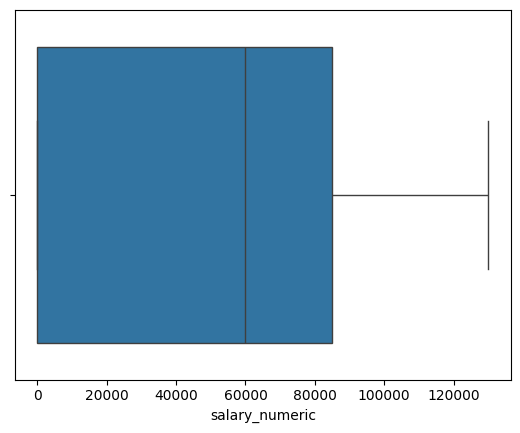

In [65]:
#Crear un boxplot
sns.boxplot(x=df_sin_nulos['salary_numeric'])

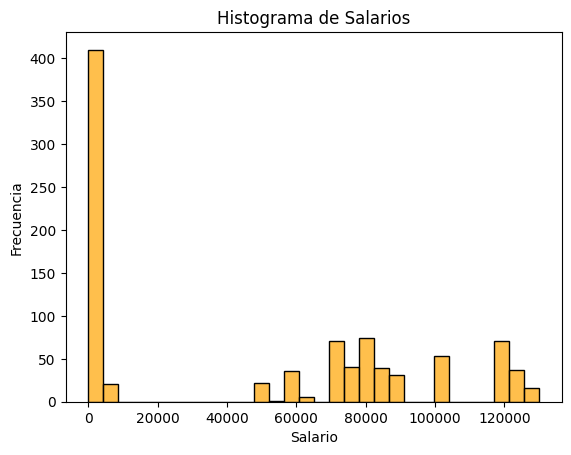

In [69]:
#Histograma
sns.histplot(df_sin_nulos['salary_numeric'], bins=30, color = 'orange', alpha=0.7)

#Etiquetas y título
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Salarios')

#Mostrar el gráfico
plt.show()

Los gráficos no son muy útiles, puesto que para determinados puestos de trabajo el salario se indica por hora y para otros por año

In [79]:
#FIltramos aquellos datos que tengan un salario mayor a 20000
df_sin_nulos = df_sin_nulos[df_sin_nulos['salary_numeric'] > 20000]


<Axes: xlabel='salary_numeric'>

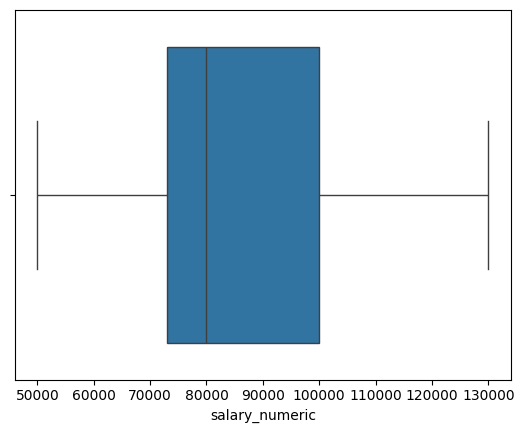

In [80]:
#Crear boxplot
sns.boxplot(x=df_sin_nulos['salary_numeric'])

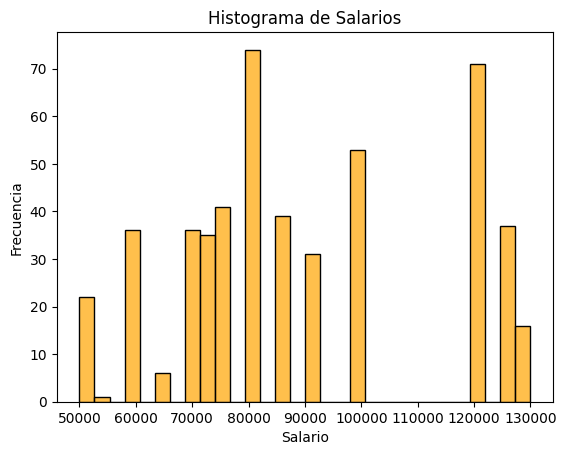

In [81]:
#crear histograma
sns.histplot(df_sin_nulos['salary_numeric'], bins=30, color = 'orange', alpha=0.7)

#Titulos y etiquetas
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Salarios')

#Mostrar el gráfico
plt.show()
